# Draft1 Single CD economy 

In [13]:
import random
import math
from numpy.core.shape_base import atleast_2d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma


In [14]:
# Import functions in the function file

%run trade_functions.ipynb


## Define encounter matrix

In [15]:
economy_size=100

In [16]:


# Create a 100x100 matrix filled with 1s
matrix = np.ones((economy_size, economy_size))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)


## Define Homogeneous Economy

In [17]:
# Only M is used in these simulations
# M=5000,G1=5000,G2=5000 alpha1，alpha2，eta=2
agent_a = create_agent()
agent_a['id_list'] = [i for i in range(economy_size)]
agent_a['parameter']=[[2,2,2] for _ in range(economy_size)]
agent_a['money']=[50 for _ in range(economy_size)]
agent_a['gooda']=[50 for _ in range(economy_size)]
agent_a['goodb']=[50 for _ in range(economy_size)]


## Define Heterogeneous Economy

In [18]:
# Only M is used in these simulations
# M=5000,G1=5000,G2=5000  Half alpha1，alpha2，eta=2,Half alpha1，alpha2，eta=3
agent_b = create_agent()
agent_b['id_list'] = [i for i in range(economy_size)]
agent_b['parameter']=[[2,2,2]]*int(economy_size/2)+[[3,3,3]]*int(economy_size/2)
agent_b['money']=[50 for _ in range(economy_size)]
agent_b['gooda']=[50 for _ in range(economy_size)]
agent_b['goodb']=[50 for _ in range(economy_size)]



##  CD economy Intratrade using metropolis

In [19]:

# input target economy, num of iteration ,utility function and trade function
# This function returns final state of the economy and the M history for each agent
def intra_tradecd(agent,length,f1,f2,tradef):
  
  mla=agent['money'].copy()
  gala=agent['gooda'].copy()
  gbla=agent['goodb'].copy()
  parameter=agent['parameter'].copy()
  
  
  money_history=[]
  gooda_history=[]
  for i in range(length):
    
    galn,gbln,mln=tradef(gala,gbla,mla,parameter,matrix,1,f1,f2)
    gala=galn.copy()
    gbla=gbln.copy()
    mla=mln.copy()
    
    money_history.append(mla.copy())
    

  return mla,money_history
  







# Plot functions

In [20]:
# this function plot time averaged money for selected agent and the theretical value
def plot_time_average(lista,idx,economy_size,theoretical_value):
  len_list=len(lista)+1
  numbers = list(range(1, len_list))
  time_scale=economy_size**2-economy_size
  time_index = [num / time_scale for num in numbers]
  # Assuming list2k is defined and contains your data
  
  # Extract the a_th item from each sublist
  extracted_items = [sublist[idx] for sublist in lista]

  # Calculate the time average
  cumulative_sum = np.cumsum(extracted_items)
  time_average = [cumulative_sum[i] / (i+1) for i in range(len(extracted_items))]



  # Create the plot
  plt.figure(figsize=(5, 5))
  plt.plot(time_index, time_average, '-o',color='blue')
  plt.xlabel('Time')
  plt.ylabel('Time-averaged Money')

  plt.axhline(y=theoretical_value, color='red', linestyle='--')
  plt.grid(True)
  plt.tight_layout()
  plt.show()


In [21]:
# this function plot log T and log Time aveaged M and a Slope 1/2 dotted line to compare the Slope.
def plot_log(lista,idx,economy_size,slope_func):
  mean_list=np.mean(lista[0])
  len_list=len(lista)+1
  numbers = list(range(1, len_list))
  
  time_scale=economy_size**2-economy_size
  time_index = [num / time_scale for num in numbers]



  # Prepare the figure and axes for a 2x5 grid

  list_m=[]
  # Iterate over each item from 1 to 10 in the sublist
  for idx in range(economy_size):
      extracted_items = [sublist[idx] for sublist in lista]
      cumulative_sum = np.cumsum(extracted_items)
      time_average = [cumulative_sum[i] / (i+1) for i in range(len(extracted_items))]




      log_m = [math.log(0.01) if abs(item - mean_list) < 0.01 else math.log(abs(item - mean_list) ) for item in time_average]
      list_m.append(log_m)









  


  average_list = [np.mean([sublist[i] for sublist in list_m]) for i in range(len(list_m[0]))]




  log_t = [math.log(item) for item in time_index]
  plt.figure(figsize=(5, 5))
  # Create a scatter plot
  plt.scatter(log_t, average_list, marker='o', color='blue')
  x = np.array([slope_func[2], max(log_t)])
  y = slope_func[0] - slope_func[1] * x
  plt.plot(x, y, color='red', linestyle=':')
  plt.text(0, 2, 'Slope -1/2', fontsize=10, verticalalignment='bottom')
  # Add labels and a title
  plt.xlabel('Log_Time')
  plt.ylabel('Log(Average Money -M/N)')


  # Display the plot
  plt.grid(True)
  plt.show()

## Homogeneous Economy Sample ( Fig1a and Fig1b)


In [22]:
m,m_his=intra_tradecd(agent_a,200000,utility_func_cd,utility_func_cd,intra_trade)

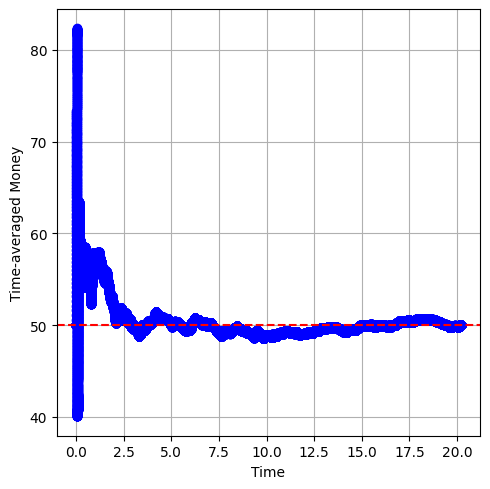

In [23]:
# plot  Time averaged money for the first sample agent
plot_time_average(m_his,0,100,50)



200000


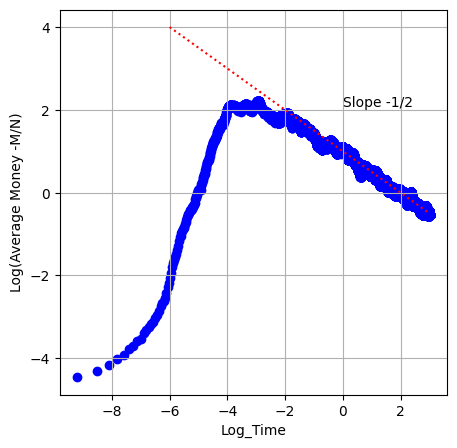

In [24]:
Plot log time averaged  Money- M/N
plot_log(m_his,0,100,[1,0.5,-6])

## CD economy Only trade with 2 neighbors

In [29]:
m,m_his=intra_tradecd(agent_a,400000,utility_func_cd,utility_func_cd,intra_traden)

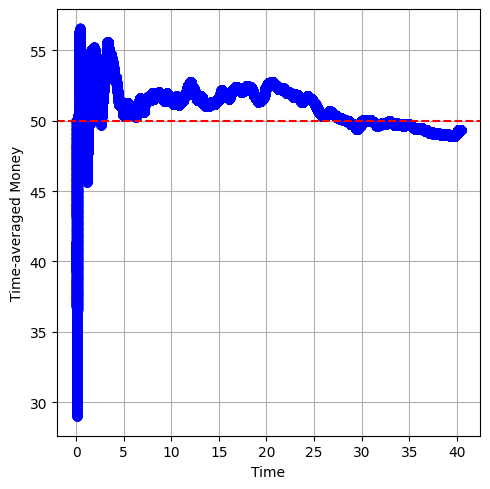

In [30]:
plot_time_average(m_his,0,100,50)

400000


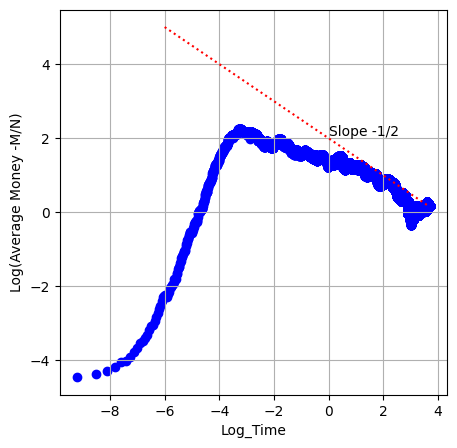

In [33]:
plot_log(m_his,0,100,[2,0.5,-6])

## part

In [35]:
m,m_his=intra_tradecd(agent_a,400000,utility_func_cd,utility_func_cd,intra_tradep)

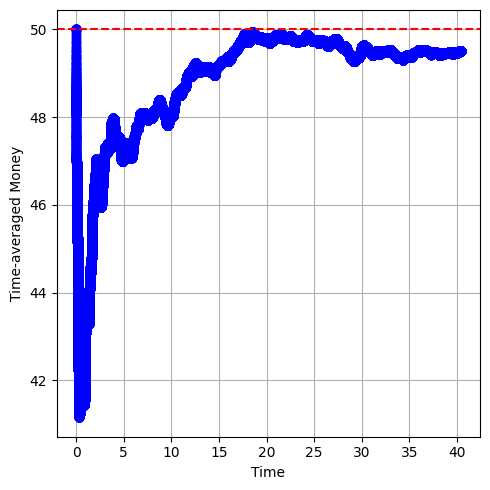

In [36]:
plot_time_average(m_his,0,100,50)

400000


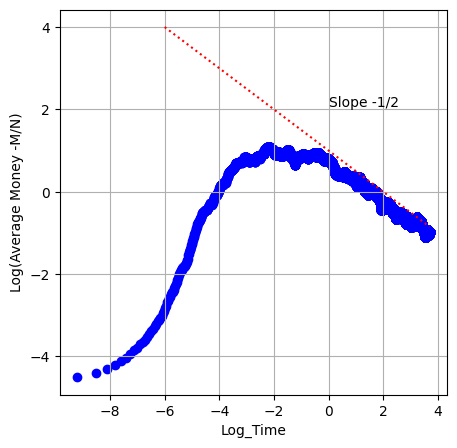

In [37]:
plot_log(m_his,0,100,[1,0.5,-6])

## Heterogeneous Economy Sample (Fig2a and Fig2b)


In [39]:
m2,m_his2=intra_tradecd(agent_b,200000,utility_func_cd,utility_func_cd,intra_trade)

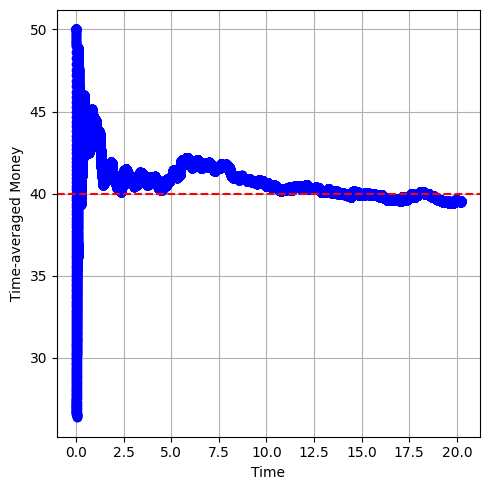

In [40]:
# agents with eta=2 has theoretical M 40
plot_time_average(m_his2,0,100,40)

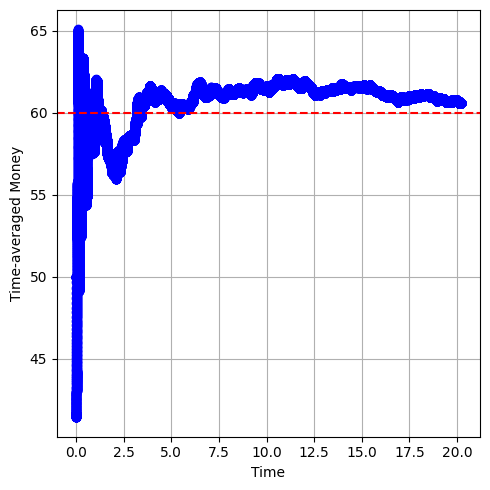

In [41]:
# agents with eta=3 has theoretical M 40
plot_time_average(m_his2,60,100,60)

## Variance

In [44]:
# This function is used to calculate subset of agent 's variance
def compute_variance(item_list, size,agent):
    values = []
    C_a=0
    
    # Pick random indices
    index = np.random.choice(economy_size, size=size, replace=False)
    
    for item in item_list:
        value_sum =sum(item[i] for i in index)
        values.append(value_sum)
    for j in index:
        C_a=C_a+agent['parameter'][j][0]
    return np.var(values),C_a

In [50]:
# We pick 3 samples from Heterogeneous Economy  with half eta=2, half eta=3 so Sum_eta has 4 combinations, 6,7,8,9. thencompare the variance of agent subset with theoretical value
a=[]
b=[]
c=[]
d=[]
for _ in range(5000):
  size=3
  


  va, vt = compute_variance(m_his2,size,agent_b)  # Assuming last_1000 is defined somewhere or can be different each iteration
  if vt == 6:
      a.append(va)
  elif vt == 7:
      b.append(va)
  elif vt == 8:
      c.append(va)
  elif vt == 9:
      d.append(va)

# Calculate means of each list



print("Mean/std/len of list a:", int(np.mean(a)),int(np.std(a)),len(a))
print("Mean/std/len of list b:", int(np.mean(b)),int(np.std(b)),len(b))
print("Mean/std/len of list c:", int(np.mean(c)),int(np.std(c)),len(c))
print("Mean/std/len of list d:", int(np.mean(d)),int(np.std(d)),len(d))




Mean and std of list a: 2321 96 6086
Mean of list b: 2693 105 18899
Mean of list c: 3065 116 19012
Mean of list d: 3430 126 6003


In [51]:
def print_with_uncertainty(lst):
    a=int(np.mean(lst))
    b=int(np.std(lst))
    return f"{a} (± {b})"



In [52]:
c6,c7,c8,c9=print_with_uncertainty(a),print_with_uncertainty(b),print_with_uncertainty(c),print_with_uncertainty(d)

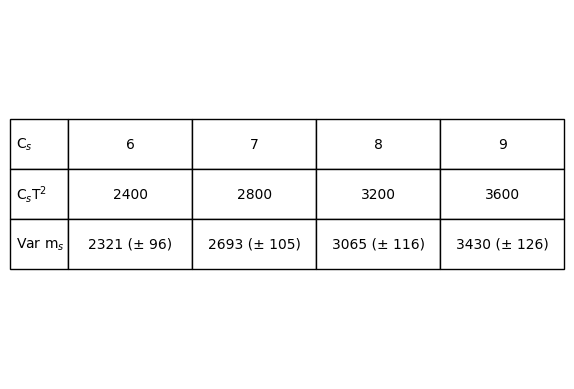

In [53]:
theoretical_values = [2400, 2800, 3200, 3600]
C_s = [6, 7, 8, 9]

Var_ms = [c6,c7,c8,c9]


data = [ C_s, theoretical_values,Var_ms]

rows = ['C$_s$', 'C$_s$T$^2$', 'Var m$_s$']
rowColours=["#377eb8","#377eb8","#377eb8"]

#columns = ['1', '2','3','4']
# colColours=["#F0C9C0","#F0C9C0","#F0C9C0","#F0C9C0" ]
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
result_table = ax.table(cellText=data,rowLabels=rows,
     cellLoc = 'center',
                     loc='center')

result_table.scale(1,3)
plt.show()

# Compute KS and KR distance

In [46]:
# we used cdf1+cdf2 so it can be used for mixed cdf
def compute_ks_distance(ml,k1,theta1,k2,theta2):
    # Sort kl and compute the ECDF
    sorted_ml = np.sort(ml)
    n = len(ml)
    ecdf = np.arange(1, n + 1) / n


    # Parameters for the gamma distribution

    gamma_cdf1 = gamma.cdf(sorted_ml, k1, scale=theta1)
    gamma_cdf2 = gamma.cdf(sorted_ml, k2, scale=theta2)
    mixture_cdf = 0.5 * gamma_cdf1 + 0.5 * gamma_cdf2


    # Calculate the K-S distance
    ks_distance = np.max(np.abs(ecdf - mixture_cdf))

    return ks_distance

In [47]:
# we used cdf1+cdf2 so it can be used for mixed cdf
def compute_kr_distance(ml,k1,theta1,k2,theta2):
    # Sort kl and compute the ECDF
    sorted_ml = np.sort(ml)
    n = len(ml)
    ecdf = np.arange(1, n + 1) / n

    gamma_cdf1 = gamma.cdf(sorted_ml, k1, scale=theta1)
    gamma_cdf2 = gamma.cdf(sorted_ml, k2, scale=theta2)
    mixture_cdf = 0.5 * gamma_cdf1 + 0.5 * gamma_cdf2

    # Calculate the K-R distance
    kr_distance = np.sum(np.abs(ecdf - mixture_cdf)) / n

    return kr_distance

In [48]:


def plot_log_kr(m_list, k1, theta1, k2, theta2):
    kr_list = []
    for i in range(len(m_list)):
        ml = m_list[i]
        kr = compute_kr_distance(ml,k1, theta1, k2, theta2)
        kr_list.append(kr)

    # Create a list of numbers from 1 to the length of kr_list
    numbers = list(range(1, len(kr_list) + 1))

    # Compute the log of each number divided by 9900
    result = [num / 9900 for num in numbers]
    kr_sublist = kr_list[:300]



    log_kr_list = [math.log(item) for item in kr_sublist]



    result_sublist = result[:300]
    return log_kr_list,result_sublist








In [53]:
import numpy as np
import matplotlib.pyplot as plt

def plot_log_ks(ml, k1, theta1, k2, theta2):
    ks_list = []
    for i in range(len(ml)):
        m = ml[i]
        ks = compute_ks_distance(m,k1, theta1, k2, theta2)
        ks_list.append(ks)

    # Create a list of numbers from 1 to the length of kr_list
    numbers = list(range(1, len(ks_list) + 1))

    # Compute the log of each number divided by 9900
    result = [num / 9900 for num in numbers]
    ks_sublist = ks_list[:300]



    log_ks_list = [math.log(item) for item in ks_sublist]



    result_sublist = result[:300]
    return log_ks_list,result_sublist

## Homogeneous KL and KS Divergence



## KR distance


In [50]:

kr,time_kr=plot_log_kr(m_his,2,50/2,2,50/2)


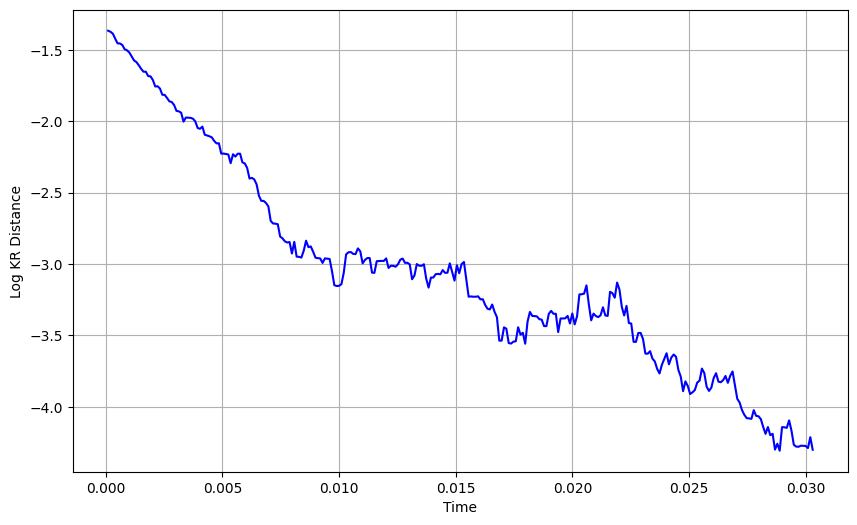

In [51]:
# Plot kr_list against result
plt.figure(figsize=(10, 6))
plt.plot(time_kr, kr,color='blue')
plt.xlabel('Time')
plt.ylabel('Log KR Distance')

plt.grid(True)
plt.show()

In [54]:
ks,time_ks=plot_log_ks(m_his,2,50/2,2,50/2)

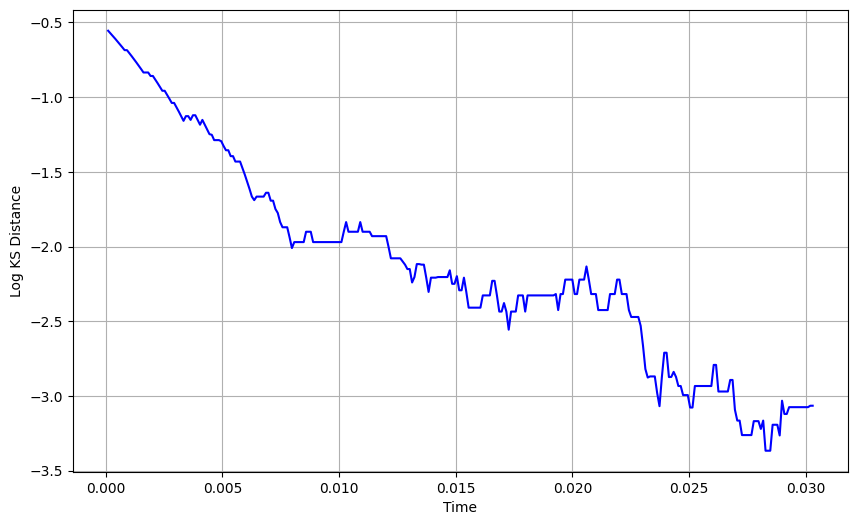

In [55]:
# Plot kr_list against result
plt.figure(figsize=(10, 6))
plt.plot(time_ks, ks,color='blue')
plt.xlabel('Time')
plt.ylabel('Log KS Distance')

plt.grid(True)
plt.show()

## cdf


In [56]:
m3,m_his3=intra_tradecd1(agent_a,100000,utility_func_cd,utility_func_cd)

In [57]:
import numpy as np

def compute_ecdf(data):
    """Compute the ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y



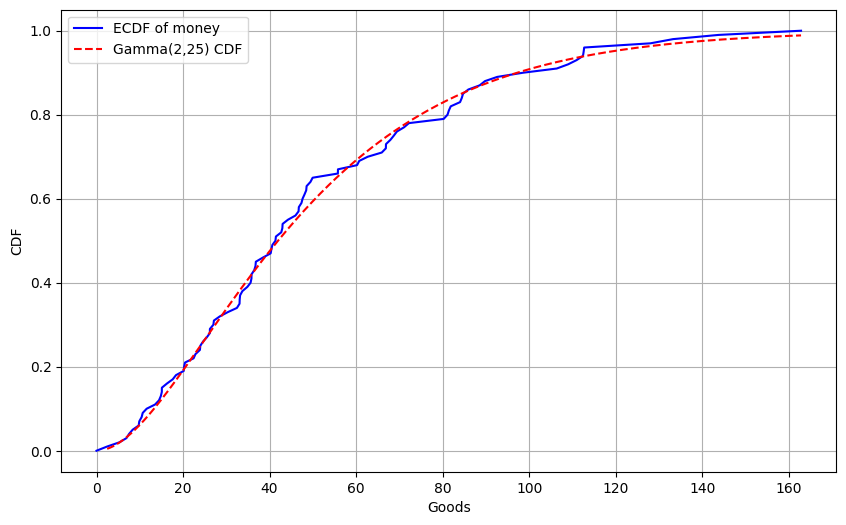

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma



x, y = compute_ecdf(m3)
x=x.tolist()
y=y.tolist()
# Parameters for the gamma distribution
x.insert(0, 0)
y.insert(0, 0)

# Define the range of x values
x_values = np.linspace(min(m3), max(m3), 1000)
gamma_cdf_values1 = gamma.cdf(x_values, 2, scale=25)
gamma_cdf_values2 = gamma.cdf(x_values, 2, scale=25)
gamma_cdf_values = 0.5 * gamma_cdf_values1 + 0.5 * gamma_cdf_values2
# Plot
plt.figure(figsize=(10,6))
plt.plot(x, y, label='ECDF of money', color='blue', linestyle='-')
plt.plot(x_values, gamma_cdf_values, label='Gamma(2,25) CDF', color='red', linestyle='--')
plt.xlabel('Goods')
plt.ylabel('CDF')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [59]:
m_sample=m_his3[-1000:]
flattened_mlist = [item for sublist in m_sample for item in sublist]
    

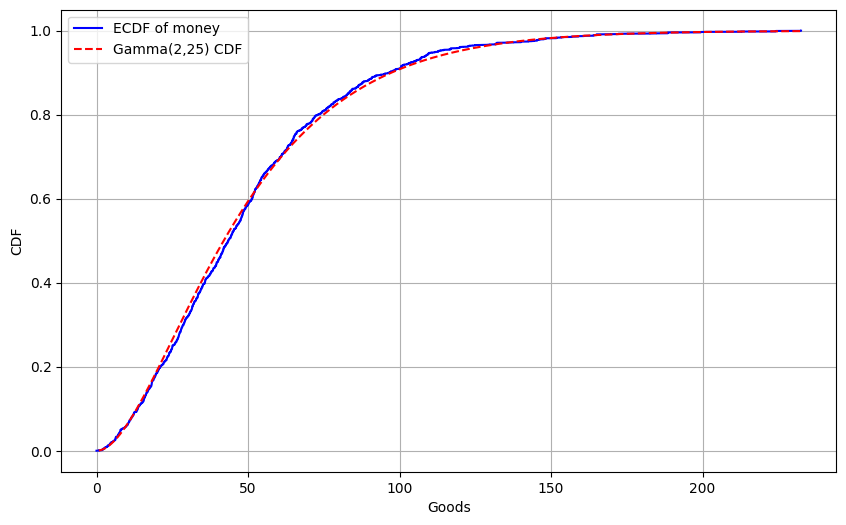

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma



x, y = compute_ecdf(flattened_mlist)
x=x.tolist()
y=y.tolist()
# Parameters for the gamma distribution
x.insert(0, 0)
y.insert(0, 0)

# Define the range of x values
x_values = np.linspace(min(flattened_mlist), max(flattened_mlist), 1000)
gamma_cdf_values1 = gamma.cdf(x_values, 2, scale=25)
gamma_cdf_values2 = gamma.cdf(x_values, 2, scale=25)
gamma_cdf_values = 0.5 * gamma_cdf_values1 + 0.5 * gamma_cdf_values2
# Plot
plt.figure(figsize=(10,6))
plt.plot(x, y, label='ECDF of money', color='blue', linestyle='-')
plt.plot(x_values, gamma_cdf_values, label='Gamma(2,25) CDF', color='red', linestyle='--')
plt.xlabel('Goods')
plt.ylabel('CDF')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()